# importing processing & visualization libraries

In [41]:
# importing fundamental liraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

# importing algorithm & data split feature
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# importing evaluation metrices for the model
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score  

# Problem Statement 

# Data Gathering

In [43]:
df = pd.read_csv('Iris.csv')
df 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [45]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [47]:
df.shape 

(150, 6)

In [49]:
rows = df.shape[0]
columns = df.shape[1]

print(rows,columns) 

150 6


In [51]:
df.columns 

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [53]:
df.index  

RangeIndex(start=0, stop=150, step=1)

In [55]:
df.axes  

[RangeIndex(start=0, stop=150, step=1),
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object')]

In [57]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [59]:
df.Id  

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

In [61]:
df.Id.unique() 

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150], dtype=int64)

In [63]:
df.Id.nunique()

150

In [65]:
df.drop(['Id'],axis=1,inplace=True) 

In [67]:
df  

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [69]:
df.Species.unique()  

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [71]:
df.Species.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)  

C:\Users\abcd\AppData\Local\Temp\ipykernel_11244\2433677458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Species.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)
C:\Users\abcd\AppData\Local\Temp\ipykernel_11244\2433677458.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

In [73]:
df 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [75]:
df.Species.unique()  

array([0, 1, 2], dtype=int64)

In [77]:
df.Species.dtype 

dtype('int64')

In [79]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [81]:
df.select_dtypes('number') 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [83]:
df.dtypes  

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [85]:
df['Species']= df['Species'].astype('float64')
df.dtypes 

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species          float64
dtype: object

In [87]:
df.describe() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# finding the correlation

In [89]:
corr = df.corr()
corr 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


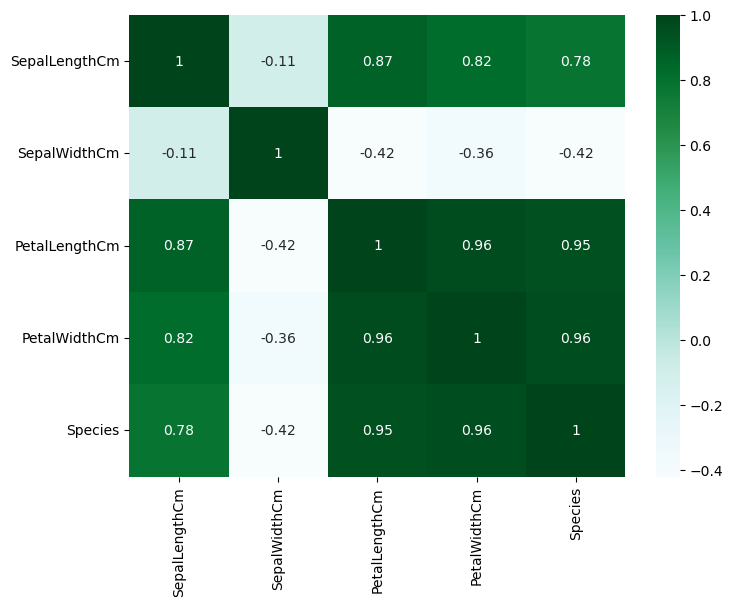

In [93]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='BuGn')
plt.savefig('Correlation matrix.png') 

In [95]:
df[~df.duplicated()] 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [97]:
df = df[~df.duplicated()]
df 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

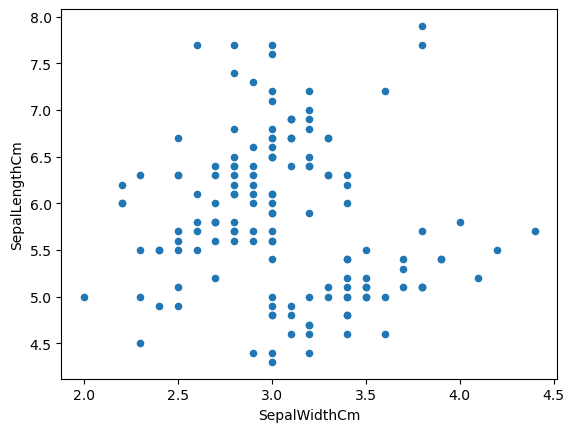

In [99]:
df.plot(x= 'SepalWidthCm',y = 'SepalLengthCm',kind='scatter')  

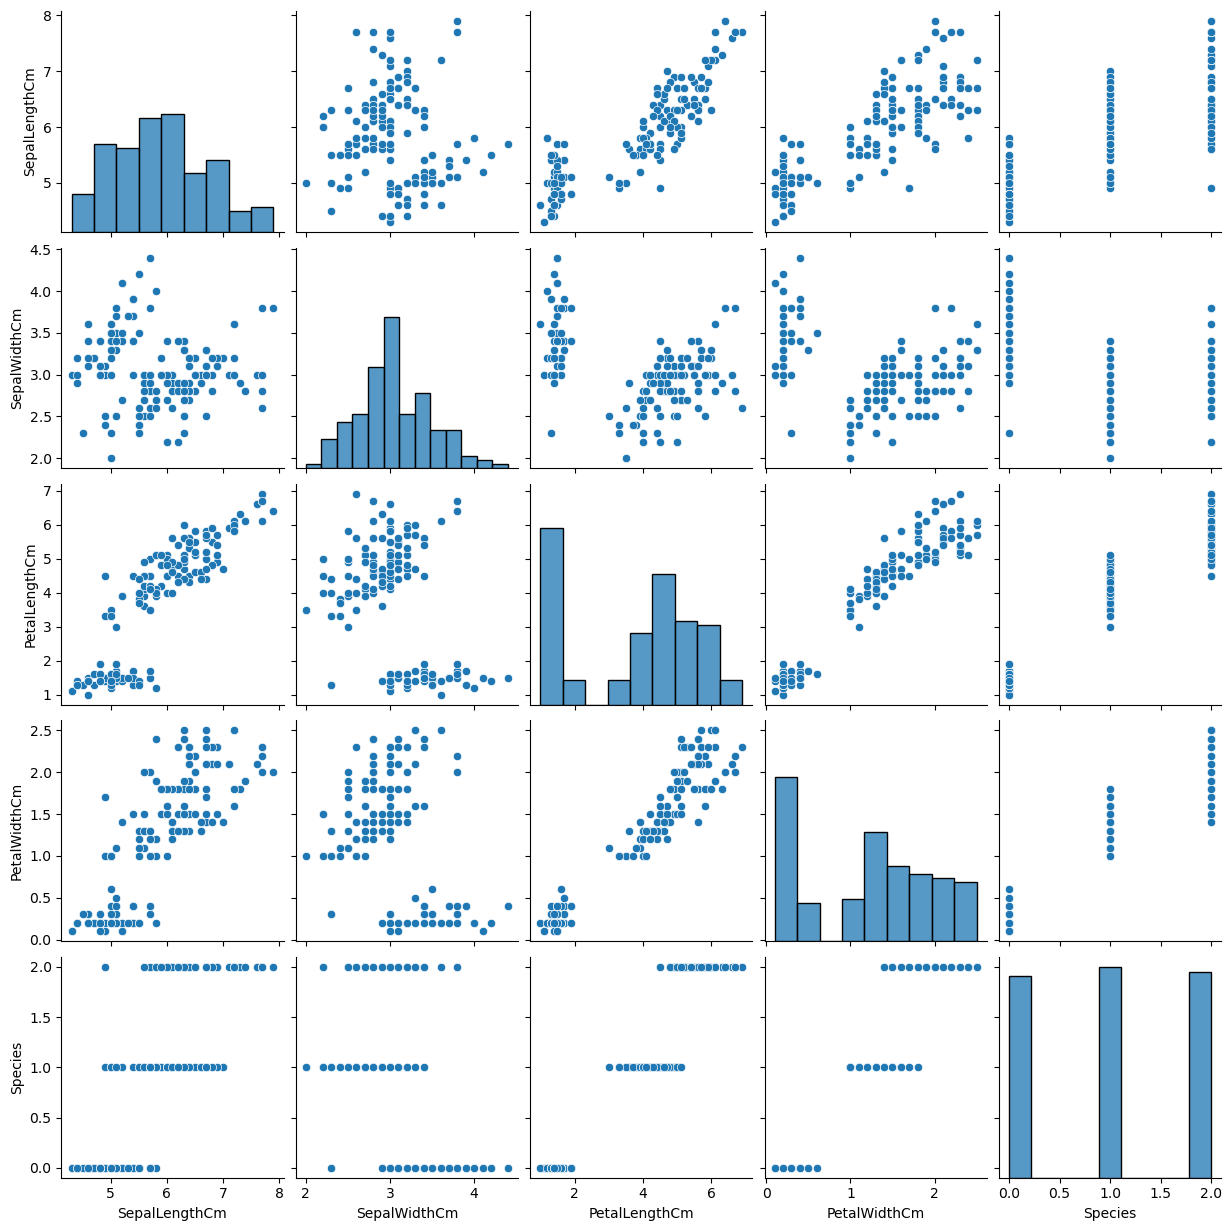

In [40]:
sns.pairplot(df) 

In [101]:
df 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [105]:
x = df.drop('SepalLengthCm',axis=1)
y = df.SepalLengthCm  

In [107]:
x 

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0.0
1,3.0,1.4,0.2,0.0
2,3.2,1.3,0.2,0.0
3,3.1,1.5,0.2,0.0
4,3.6,1.4,0.2,0.0
...,...,...,...,...
145,3.0,5.2,2.3,2.0
146,2.5,5.0,1.9,2.0
147,3.0,5.2,2.0,2.0
148,3.4,5.4,2.3,2.0


In [109]:
y 

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 147, dtype: float64

# Building a model

## splitting the data into training & testing data

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)  

In [115]:
x_train,y_train 

(     SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
 127           3.0            4.9           1.8      2.0
 134           2.6            5.6           1.4      2.0
 44            3.8            1.9           0.4      0.0
 140           3.1            5.6           2.4      2.0
 28            3.4            1.4           0.2      0.0
 ..            ...            ...           ...      ...
 135           3.0            6.1           2.3      2.0
 139           3.1            5.4           2.1      2.0
 74            2.9            4.3           1.3      1.0
 143           3.2            5.9           2.3      2.0
 39            3.4            1.5           0.2      0.0
 
 [117 rows x 4 columns],
 127    6.1
 134    6.1
 44     5.1
 140    6.7
 28     5.2
       ... 
 135    7.7
 139    6.9
 74     6.4
 143    6.8
 39     5.1
 Name: SepalLengthCm, Length: 117, dtype: float64)

In [47]:
display(x_test,y_test) 

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
101,2.7,5.1,1.9,2.0
95,3.0,4.2,1.2,1.0
56,3.3,4.7,1.6,1.0
105,3.0,6.6,2.1,2.0
100,3.3,6.0,2.5,2.0
77,3.0,5.0,1.7,1.0
91,3.0,4.6,1.4,1.0
55,2.8,4.5,1.3,1.0
46,3.8,1.6,0.2,0.0
61,3.0,4.2,1.5,1.0


101    5.8
95     5.7
56     6.3
105    7.6
100    6.3
77     6.7
91     6.1
55     5.7
46     5.1
61     5.9
5      5.4
16     5.4
93     5.0
14     5.8
60     5.0
33     5.5
75     6.6
29     4.7
68     6.2
36     5.5
119    6.0
86     6.7
31     5.4
130    7.4
111    6.4
19     5.1
53     5.5
50     7.0
122    7.7
144    6.7
Name: SepalLengthCm, dtype: float64

In [48]:
x_test.shape 

(30, 4)

# creating an instance of the model

In [119]:
Lr_model = LinearRegression() 

In [121]:
Lr_model

LinearRegression()

# training the model

In [124]:
Lr_model.fit(x_train,y_train) 

LinearRegression()

# predicting the output variable

In [130]:
y_pred = Lr_model.predict(x_test)
y_pred 

array([6.12578102, 6.10700351, 6.50237691, 7.29475743, 6.91349042,
       6.50291721, 6.32185193, 6.16670634, 5.28512559, 6.0056541 ,
       5.34732552, 5.06491082, 5.12499904, 5.12103595, 5.0887188 ,
       5.38056835, 6.18064458, 4.93015043, 5.74416491, 4.89582699,
       5.89449727, 6.41783499, 4.91030553, 6.89098029, 6.26698837,
       5.18073878, 5.51787534, 6.51078066, 7.28081919, 6.7016794 ])

In [132]:
y_test

101    5.8
95     5.7
56     6.3
105    7.6
100    6.3
77     6.7
91     6.1
55     5.7
46     5.1
61     5.9
5      5.4
16     5.4
93     5.0
14     5.8
60     5.0
33     5.5
75     6.6
29     4.7
68     6.2
36     5.5
119    6.0
86     6.7
31     5.4
130    7.4
111    6.4
19     5.1
53     5.5
50     7.0
122    7.7
144    6.7
Name: SepalLengthCm, dtype: float64

# Evaluating the model

## mse

In [136]:
mse = mean_squared_error(y_test,y_pred)
mse

0.11927583683461905

## rmse

In [139]:
np.sqrt(mse)

0.3453633403165702

## mae

In [142]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.2889264515656188

## r2 score

In [145]:
r2_value = r2_score(y_test,y_pred)
r2_value 

0.8016330601833891

## Adjusted R2

In [148]:
Adj_R2 = 1 - ((1-r2_value)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))
Adj_R2 

0.79459877153741

In [ ]:
Adj R2 = 1 - ((1-R2)*(N-1)/(N-P-1))